# Premier League

<font color = black size=4> A **Premier League** é a um dos campeonatos de futebol mais conhecidos e amados do mundo e muitas pessoas acompanham quase que religiosamente as partidas, torcendo dentre os 20 times que a disputam. É a primeira divisão do campeonato, onde somente os melhores time da Inglaterra podem alcançar! A ascenção dos times ingleses se deu pois vários bilionários se tornaram donos de clubes e investiram para torna-los melhores, tais como Manchester City, Chelsea e Tottenham. Dito isto, eu peguei os questionamentos do Kaggle, onde também contém o <a href='https://www.kaggle.com/aj7amigo/english-premier-league-data-2009-2019'>Dataset</a>, para analisar as características das partidas  </font>

# Importando as bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Lendo os dados

In [2]:
dados_partida = pd.read_csv('English_Premier_League_data_2009-2019.csv')
dados_partida.head(3)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,2009-08-15 00:00:00,Aston Villa,Wigan,0,2,A,0,1,A,...,5,7,15,14,4,6,2,2,0,0
1,E0,2009-08-15 00:00:00,Blackburn,Man City,0,2,A,0,1,A,...,9,5,12,9,5,4,2,1,0,0
2,E0,2009-08-15 00:00:00,Bolton,Sunderland,0,1,A,0,1,A,...,3,13,16,10,4,7,2,1,0,0


# Tratamento dos dados (tradução)

In [3]:
#Excluindo uma variável que não utilizaremos e traduzindo nome das colunas
dados_partida.drop('Div', inplace=True, axis=1) 
dados_partida.columns = ['Data','Time_casa','Time_fora','Gols_90min_casa','Gols_90min_fora','Vencedor_90min','Gols_45min_casa',
       'Gols_45min_fora','Vencedor_45min','Juiz','Chutes_casa','Chutes_fora','Chutes_certos_casa','Chutes_certos_fora',
       'Faltas_casa','Faltas_fora','Escanteio_casa','Escanteio_fora','Amarelo_casa','Amarelo_fora','Vermelho_casa','Vermelho_fora']

In [4]:
#Traduzindo valor dos registros das variáveis
dados_partida.Vencedor_90min.replace(['H','A','D'],['Casa','Fora','Empate'], inplace=True)
dados_partida.Vencedor_45min.replace(['H','A','D'],['Casa','Fora','Empate'], inplace=True)

# Legenda

Data - Data que ocorreu o jogo <br>
Time_casa - Time que jogou como mandante<br>
Time_fora - Time que jogou como visitante<br>
Gols_90min_casa - Gols do time mandatante no jogo inteiro<br>
Gols_90min_fora - Gols do time visitante no jogo inteiro<br>
Vencedor_90min - Resultado Final (Casa - Time mandante ganhou, Fora - Time visitante ganhou, Empate - Bem intuitivo, né?)<br>
Gols_45min_casa - Gols no 1° tempo do time mandante<br>
Gols_45min_fora - Gols no 1° tempo do time visitante<br>
Vencedor_45min - Resultado 1° tempo - (Casa - Time mandante ganhou, Fora - Time visitante ganhou, Empate - Já sabem)<br>
Juíz - Nome do juíz que apitou a partida<br>
Chutes_casa - Total de chutes do time mandante<br>
Chutes_fora - Total de chutes do time visitante<br>
Chutes_certos_casa - Total chutes no gol do time mandante<br>
Chutes_certos_fora - Total chutes no gol do time visitante<br>
Faltas_casa - Total de faltas cometidas pelo time mandante<br>
Faltas_fora - Total de faltas cometidas pelo time visitante<br>
Escanteio_casa - Total de escanteios de ataque para o time mandante (concedidos pelo time visitante)<br>
Escanteio_fora - Total de escanteios de ataque para o time visitante (concedidos pelo time mandante)<br>
Amarelo_casa - Total de cartões amarelo recebido pelo time mandante<br>
Amarelo_fora - Total de cartões amarelo recebido pelo time visitantes<br>
Vermelho_casa - Total de cartões vermelho recebido pelo time mandante<br>
Vermelho_fora - Total de cartões vermelho recebido pelo time visitante<br>

In [5]:
#Iremos excluir essas colunas pois não utilizaremos nessa análise.

dados_partida = dados_partida.drop(['Vermelho_fora','Vermelho_casa','Amarelo_fora','Amarelo_casa','Escanteio_fora','Escanteio_casa',
                                    'Faltas_fora','Faltas_casa','Chutes_certos_fora','Chutes_certos_casa','Chutes_fora','Chutes_casa'],axis=1)

In [6]:
dados_partida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Data             3800 non-null   object
 1   Time_casa        3800 non-null   object
 2   Time_fora        3800 non-null   object
 3   Gols_90min_casa  3800 non-null   int64 
 4   Gols_90min_fora  3800 non-null   int64 
 5   Vencedor_90min   3800 non-null   object
 6   Gols_45min_casa  3800 non-null   int64 
 7   Gols_45min_fora  3800 non-null   int64 
 8   Vencedor_45min   3800 non-null   object
 9   Juiz             3800 non-null   object
dtypes: int64(4), object(6)
memory usage: 297.0+ KB


# Análise Exploratória de dados 

### Quantas partidas foram jogadas entre 2009 e 2019 na PL?


In [7]:
dados_partida.shape[0]

3800

### Quais e quantos times jogaram a PL durante essas 10 temporadas?


In [8]:
total_times = dados_partida.Time_casa.unique()
total_times = pd.DataFrame(total_times)

print('{} times jogaram a PL nas últimas 10 temporadas'.format(total_times.count().values[0]))
print('Esses times participaram do campeonato: {}'.format((total_times)))

36 times jogaram a PL nas últimas 10 temporadas
Esses times participaram do campeonato:                  0
0      Aston Villa
1        Blackburn
2           Bolton
3          Chelsea
4          Everton
5       Portsmouth
6            Stoke
7           Wolves
8       Man United
9        Tottenham
10      Sunderland
11           Wigan
12      Birmingham
13         Burnley
14            Hull
15       Liverpool
16         Arsenal
17        Man City
18          Fulham
19        West Ham
20       West Brom
21       Newcastle
22       Blackpool
23             QPR
24         Swansea
25         Norwich
26         Reading
27     Southampton
28  Crystal Palace
29         Cardiff
30       Leicester
31     Bournemouth
32         Watford
33   Middlesbrough
34        Brighton
35    Huddersfield


### Quantas partidas foram jogadas por cada time nas últimas 10 temporadas?


In [9]:
partidas_total = dados_partida.Time_casa.value_counts()+dados_partida.Time_fora.value_counts()
partidas_total

Everton           380
Man City          380
Tottenham         380
Chelsea           380
Liverpool         380
Arsenal           380
Man United        380
West Ham          342
Stoke             342
Sunderland        304
West Brom         304
Newcastle         304
Aston Villa       266
Swansea           266
Southampton       266
Crystal Palace    228
Fulham            228
Leicester         190
Burnley           190
Wigan             152
Norwich           152
Bournemouth       152
Hull              152
Wolves            152
Watford           152
Blackburn         114
Bolton            114
QPR               114
Cardiff            76
Brighton           76
Huddersfield       76
Birmingham         76
Middlesbrough      38
Blackpool          38
Reading            38
Portsmouth         38
dtype: int64

### Quais times participaram de todas as últimas 10 temporadas da PL?


In [10]:
# Como cada temporada tem 38 jogos, sendo metade como mandante e metade como visitante, pode-se concluir que:
# Se um time em 10 temporadas tem 190 jogos como mandante, significa que também tem 190 jogos como visitante, totalizando 
# o máximo de jogos que um time pode jogar em 10 temporadas.

times_jogos_casa = dados_partida.Time_casa.value_counts().reset_index()

melhores_times = times_jogos_casa.query('Time_casa==190')
melhores_times['index']

0       Everton
1      Man City
2     Tottenham
3       Chelsea
4     Liverpool
5       Arsenal
6    Man United
Name: index, dtype: object

### Quais times jogaram só uma  temporada?

In [11]:
#Seguindo o raciocínio da pergunta anterior, para um time jogar só uma temporada, ele tem que ter no máximo 38 partidas, sendo
#19 como visitante e 19 como mandante

piores_times = times_jogos_casa.query('Time_casa==19')
piores_times['index']

32    Middlesbrough
33        Blackpool
34          Reading
35       Portsmouth
Name: index, dtype: object

### Qual a porcentagem de jogos ganhos por times mandantes, visitantes e/ou empates?


In [12]:
percentual_vitoria = dados_partida.Vencedor_90min.value_counts(normalize=True)*100
percentual_vitoria

Casa      46.263158
Fora      29.000000
Empate    24.736842
Name: Vencedor_90min, dtype: float64

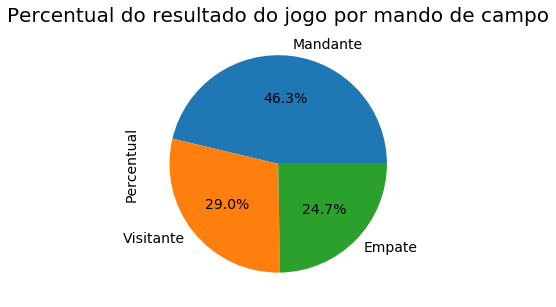

In [13]:
resultados_porcentagem = pd.DataFrame(percentual_vitoria)
labels=['Mandante','Visitante','Empate']

resultados_porcentagem.plot(kind='pie', y='Vencedor_90min',
                            labels=labels, legend=False,
                            autopct='%1.1f%%',fontsize=14,
                           figsize=(5,5))
plt.title('Percentual do resultado do jogo por mando de campo', fontsize=20)
plt.ylabel('Percentual', fontsize=14);


### Quantos juízes apitaram os jogos entre 2009 e 2019?


In [14]:
juizes = dados_partida.Juiz.unique()
pd.DataFrame(juizes).count()[0]

30

### Liste-os com o total de partidas apitadas


In [15]:
contagem_juizes = dados_partida.Juiz.value_counts()
contagem_juizes

M Dean           291
M Atkinson       280
A Marriner       253
M Oliver         234
A Taylor         226
L Mason          222
M Clattenburg    206
K Friend         204
J Moss           200
M Jones          190
L Probert        159
P Dowd           159
H Webb           147
C Foy            135
C Pawson         134
N Swarbrick      132
R East            91
R Madley          91
S Attwell         89
P Walton          69
M Halsey          61
P Tierney         55
G Scott           50
C Kavanagh        40
S Bennett         29
A Wiley           26
D Coote           12
S Hooper          10
K Stroud           3
A Madley           2
Name: Juiz, dtype: int64

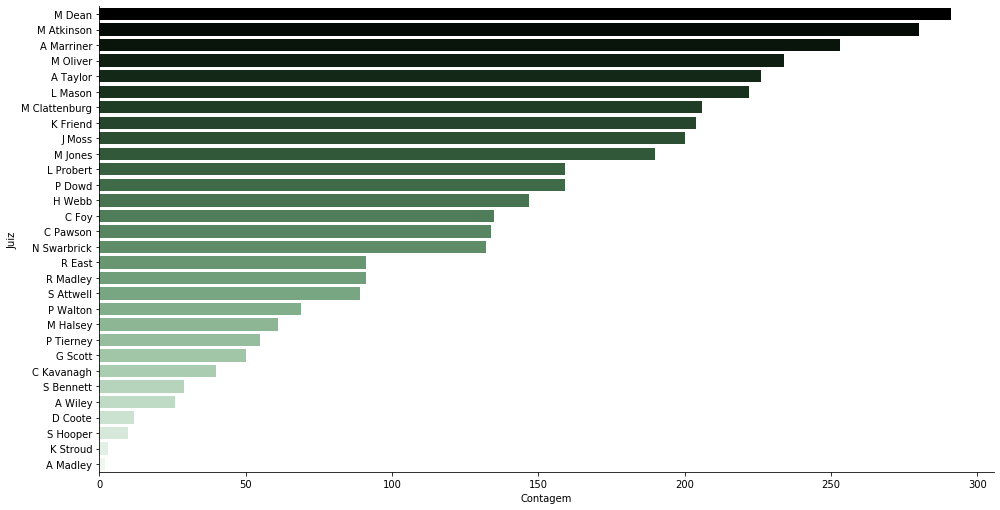

In [16]:
#contagem_juizes.plot(kind='bar',figsize=(10,7))

palette = sns.cubehelix_palette(30, start=2, rot=0, dark=0, light=.95, reverse=True)
ax = sns.catplot(y="Juiz", kind="count", palette=palette, data=dados_partida,
            height=7, aspect=2, order = contagem_juizes.index)
ax.set_axis_labels("Contagem", "Juiz")

### Em quantos jogos os times que estavam perdendo no 1tempo, ganharam o jogo no final?(vitória de virada) Liste todos eles


In [17]:
vencedores = dados_partida[['Vencedor_45min','Vencedor_90min']]
vitoria_de_virada = vencedores.query('Vencedor_45min=="Casa" and Vencedor_90min=="Fora" or Vencedor_45min=="Fora" and Vencedor_90min=="Casa"')
vitoria_de_virada.count()[0]

153

### Gerar um data frame com as seguintes informações:<br>
a. Numero de jogos por time. <br>
b. Vitoria de mandantes.<br>
c. Derrota de mandantes por time.<br>
d. Vitória de visitantes por time.<br>
e. Derrota de visitantes por time.<br>
f. Numero de empates por time.<br>
g. Total de pts durante as 10 temporadas.<br>

In [18]:
#a

jogos_por_time = dados_partida.Time_casa.value_counts()*2
jogos_por_time = pd.DataFrame(jogos_por_time)
jogos_por_time.sort_index(inplace=True)
jogos_por_time.head()

,Time_casa
Arsenal,380
Aston Villa,266
Birmingham,76
Blackburn,114
Blackpool,38


In [19]:
#b
# Casa = 0, Fora = 1, Empate = 2 

colunas=['Time_casa','Vencedor_90min_numerico'] #Criando as labels
dados_partida['Vencedor_90min_numerico'] = dados_partida.Vencedor_90min.replace(['Casa','Fora','Empate'],[0,1,2]) #Criando coluna numérica

vitoria_casa = dados_partida[(dados_partida.Vencedor_90min_numerico == 0)][colunas].groupby('Time_casa').count()
#Agrupando a contagem de quando a colunar Vencedor_90min_numerico for igual a 0, já colocando as labels.
vitoria_casa.head()

,Vencedor_90min_numerico
Time_casa,
Arsenal,129
Aston Villa,38
Birmingham,14
Blackburn,23
Blackpool,5


In [20]:
#c

derrota_casa = dados_partida[(dados_partida.Vencedor_90min_numerico == 1)][colunas].groupby('Time_casa').count()
derrota_casa.head()

,Vencedor_90min_numerico
Time_casa,
Arsenal,24
Aston Villa,54
Birmingham,7
Blackburn,20
Blackpool,9


In [21]:
#d
colunas2=['Time_fora','Vencedor_90min_numerico']
vitoria_fora = dados_partida[(dados_partida.Vencedor_90min_numerico == 1)][colunas2].groupby('Time_fora').count()
vitoria_fora.head()

,Vencedor_90min_numerico
Time_fora,
Arsenal,84
Aston Villa,31
Birmingham,7
Blackburn,9
Blackpool,5


In [22]:
#e
derrota_fora = dados_partida[(dados_partida.Vencedor_90min_numerico == 0)][colunas2].groupby('Time_fora').count()
derrota_fora.head()

,Vencedor_90min_numerico
Time_fora,
Arsenal,63
Aston Villa,66
Birmingham,22
Blackburn,34
Blackpool,10


In [23]:
#f
#Criando dataframes para contagem de empates em casa e fora e colocando a soma desses valores numa lista chamada empates
#Feito isso, criei um DF com os valores de empate e a label dos nomes do times ordenados.
empate_casa = dados_partida[(dados_partida.Vencedor_90min_numerico == 2)][colunas].groupby('Time_casa').count()
empate_fora = dados_partida[(dados_partida.Vencedor_90min_numerico == 2)][colunas2].groupby('Time_fora').count()

empates = empate_casa.values+empate_fora.values
empates = pd.DataFrame(empates,index=['Everton', 'Tottenham', 'Liverpool', 'Arsenal', 'Man City', 'Chelsea',
       'Man United', 'Stoke', 'West Ham', 'Sunderland', 'Newcastle',
       'West Brom', 'Southampton', 'Swansea', 'Aston Villa', 'Fulham',
       'Crystal Palace', 'Burnley', 'Leicester', 'Norwich', 'Hull',
       'Bournemouth', 'Wolves', 'Watford', 'Wigan', 'Blackburn', 'Bolton',
       'QPR', 'Brighton', 'Cardiff', 'Birmingham', 'Huddersfield', 'Blackpool',
       'Portsmouth', 'Reading', 'Middlesbrough'])
empates.sort_index(inplace=True)
empates.head()


,0
Arsenal,28
Aston Villa,17
Birmingham,83
Blackburn,10
Blackpool,87


In [24]:
#g
#Localizando cada resposta na variável 'Vencedor_90min' e adicionando numa coluna 'Pontos_casa' conforme o resultado.
dados_partida.loc[dados_partida['Vencedor_90min']=='Casa', 'Pontos_casa'] = 3
dados_partida.loc[dados_partida['Vencedor_90min']=='Fora', 'Pontos_casa'] = 0
dados_partida.loc[dados_partida['Vencedor_90min']=='Empate', 'Pontos_casa'] = 1

#Localizando cada resposta na variável 'Vencedor_90min' e adicionando numa coluna 'Pontos_fora' conforme o resultado.

dados_partida.loc[dados_partida['Vencedor_90min']=='Casa', 'Pontos_fora'] = 0
dados_partida.loc[dados_partida['Vencedor_90min']=='Fora', 'Pontos_fora'] = 3
dados_partida.loc[dados_partida['Vencedor_90min']=='Empate', 'Pontos_fora'] = 1

dados_partida.head()


,Data,Time_casa,Time_fora,Gols_90min_casa,Gols_90min_fora,Vencedor_90min,Gols_45min_casa,Gols_45min_fora,Vencedor_45min,Juiz,Vencedor_90min_numerico,Pontos_casa,Pontos_fora
0,2009-08-15 00:00:00,Aston Villa,Wigan,0,2,Fora,0,1,Fora,M Clattenburg,1,0.0,3.0
1,2009-08-15 00:00:00,Blackburn,Man City,0,2,Fora,0,1,Fora,M Dean,1,0.0,3.0
2,2009-08-15 00:00:00,Bolton,Sunderland,0,1,Fora,0,1,Fora,A Marriner,1,0.0,3.0
3,2009-08-15 00:00:00,Chelsea,Hull,2,1,Casa,1,1,Empate,A Wiley,0,3.0,0.0
4,2009-08-15 00:00:00,Everton,Arsenal,1,6,Fora,0,3,Fora,M Halsey,1,0.0,3.0


In [25]:
pontos_casa = dados_partida[['Time_casa','Pontos_casa']].groupby('Time_casa').sum() #Agrupando a soma de pontos do time da casa
pontos_fora = dados_partida[['Time_fora','Pontos_fora']].groupby('Time_fora').sum() #Agrupando a soma de pontos do time de fora

lista_pontos = pontos_casa.values + pontos_fora.values #criando uma lista com os pontos totais nas 10 temporadas de cada time

pontos_total = pd.DataFrame(index=['Everton', 'Tottenham', 'Liverpool', 'Arsenal', 'Man City', 'Chelsea',
       'Man United', 'Stoke', 'West Ham', 'Sunderland', 'Newcastle',
       'West Brom', 'Southampton', 'Swansea', 'Aston Villa', 'Fulham',
       'Crystal Palace', 'Burnley', 'Leicester', 'Norwich', 'Hull',
       'Bournemouth', 'Wolves', 'Watford', 'Wigan', 'Blackburn', 'Bolton',
       'QPR', 'Brighton', 'Cardiff', 'Birmingham', 'Huddersfield', 'Blackpool',
       'Portsmouth', 'Reading', 'Middlesbrough']) #criando o index
pontos_total.sort_index(inplace=True) #ordenando o index 
pontos_total['Pontos total'] = lista_pontos #adicionando os valores ao devido index

pontos_total.head()

,Pontos total
Arsenal,719.0
Aston Villa,284.0
Birmingham,89.0
Blackburn,124.0
Blackpool,39.0


In [26]:
#Concatenando os DF's criados em um só e renomeando as colunas

times_dados = pd.concat([jogos_por_time, vitoria_casa, derrota_casa, vitoria_fora, derrota_fora, empates, pontos_total],axis=1)
times_dados.columns=['Partidas','Vitórias casa','Derrotas casa','Vitórias fora','Derrotas fora','Empates','Pts']

times_dados.head()

,Partidas,Vitórias casa,Derrotas casa,Vitórias fora,Derrotas fora,Empates,Pts
Arsenal,380,129,24,84,63,28,719.0
Aston Villa,266,38,54,31,66,17,284.0
Birmingham,76,14,7,7,22,83,89.0
Blackburn,114,23,20,9,34,10,124.0
Blackpool,38,5,9,5,10,87,39.0


### Quais jogos tiveram mais gols?


In [27]:
#Somando os gols do time mandante e visitante por partida, atribuindo os valores a uma coluna 'gols' e ordendo pelos valores

dados_partida['gols'] = dados_partida.Gols_90min_casa+dados_partida.Gols_90min_fora 
dados_partida['gols'].sort_values(ascending=False).head(20)

1328    10
1517    10
126     10
785     10
2503     9
3418     9
1921     9
200      9
1674     9
1811     9
2892     9
3113     9
2785     9
134      8
3599     8
2387     8
1728     8
627      8
309      8
625      8
Name: gols, dtype: int64

In [28]:
dados_partida.query('gols>8').head(3)

,Data,Time_casa,Time_fora,Gols_90min_casa,Gols_90min_fora,Vencedor_90min,Gols_45min_casa,Gols_45min_fora,Vencedor_45min,Juiz,Vencedor_90min_numerico,Pontos_casa,Pontos_fora,gols
126,2009-11-22 00:00:00,Tottenham,Wigan,9,1,Casa,1,0,Casa,P Walton,0,3.0,0.0,10
200,2010-01-16 00:00:00,Chelsea,Sunderland,7,2,Casa,4,0,Casa,C Foy,0,3.0,0.0,9
785,2011-08-28 00:00:00,Man United,Arsenal,8,2,Casa,3,1,Casa,H Webb,0,3.0,0.0,10


### Descubra os gols marcados como mandante, visitante e total para cada time



In [38]:
#Agrupando por time da casa e de fora o somatório de gols nas partidas e os atribuindo em gols_casa e gols_fora
gols_casa = dados_partida[['Time_casa','Gols_90min_casa']].groupby('Time_casa').sum()
gols_fora = dados_partida[['Time_fora','Gols_90min_fora']].groupby('Time_fora').sum()

#Somando os resultado e atribuindo a uma lista
gols_total_lista = gols_casa.values + gols_fora.values

#Criando DF, selecionado o index e o ordenando
gols_total = pd.DataFrame(index=['Everton', 'Tottenham', 'Liverpool', 'Arsenal', 'Man City', 'Chelsea',
       'Man United', 'Stoke', 'West Ham', 'Sunderland', 'Newcastle',
       'West Brom', 'Southampton', 'Swansea', 'Aston Villa', 'Fulham',
       'Crystal Palace', 'Burnley', 'Leicester', 'Norwich', 'Hull',
       'Bournemouth', 'Wolves', 'Watford', 'Wigan', 'Blackburn', 'Bolton',
       'QPR', 'Brighton', 'Cardiff', 'Birmingham', 'Huddersfield', 'Blackpool',
       'Portsmouth', 'Reading', 'Middlesbrough'])
gols_total.sort_index(inplace=True)

#Adicionando os valores de gols total de cada time no DF criado acima
gols_total['Gols total'] = gols_total_lista

#concatenando os gols de casa,fora e total num só DF
add = pd.concat([gols_casa,gols_fora,gols_total],axis=1)
add.columns=['Gols_casa','Gols_fora','Gols_total']
add.head()

,Gols_casa,Gols_fora,Gols_total
Arsenal,410,319,729
Aston Villa,152,129,281
Birmingham,38,37,75
Blackburn,76,59,135
Blackpool,30,25,55


In [39]:
times = pd.concat([times_dados,add],axis=1) #Concatendo 2 DF's feitos antes
times.reset_index(inplace=True) #Fazendo o index virar coluna para termos uma coluna com nome dos times
times.rename(columns={'index':'Time'},inplace=True)

times.head()

,Time,Partidas,Vitórias casa,Derrotas casa,Vitórias fora,Derrotas fora,Empates,Pts,Gols_casa,Gols_fora,Gols_total
0,Arsenal,380,129,24,84,63,28,719.0,410,319,729
1,Aston Villa,266,38,54,31,66,17,284.0,152,129,281
2,Birmingham,76,14,7,7,22,83,89.0,38,37,75
3,Blackburn,114,23,20,9,34,10,124.0,76,59,135
4,Blackpool,38,5,9,5,10,87,39.0,30,25,55


In [31]:
times['Vitórias_total'] = times['Vitórias casa'] + times['Vitórias fora']
times['Derrotas_total'] = times['Derrotas casa'] + times['Derrotas fora']

times.head()

,Time,Partidas,Vitórias casa,Derrotas casa,Vitórias fora,Derrotas fora,Empates,Pts,Gols_casa,Gols_fora,Gols_total,Vitórias_total,Derrotas_total
0,Arsenal,380,129,24,84,63,28,719.0,410,319,729,213,87
1,Aston Villa,266,38,54,31,66,17,284.0,152,129,281,69,120
2,Birmingham,76,14,7,7,22,83,89.0,38,37,75,21,29
3,Blackburn,114,23,20,9,34,10,124.0,76,59,135,32,54
4,Blackpool,38,5,9,5,10,87,39.0,30,25,55,10,19


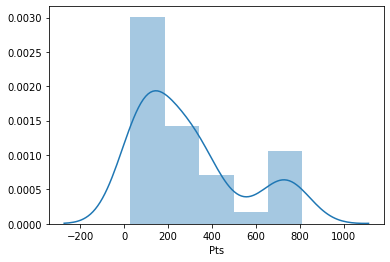

In [32]:
sns.distplot(times['Pts'])
#Muitos times com poucos pontos mas entre 620 e 800 há uma crescente destacando os melhores times.

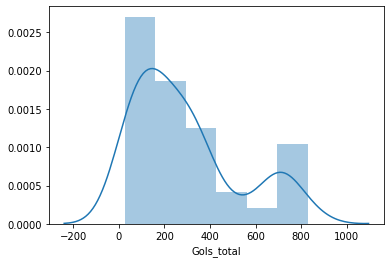

In [33]:
sns.distplot(times['Gols_total']) #Mostrando a semelhança da distribuição entre os pontos dos times e os gols marcados

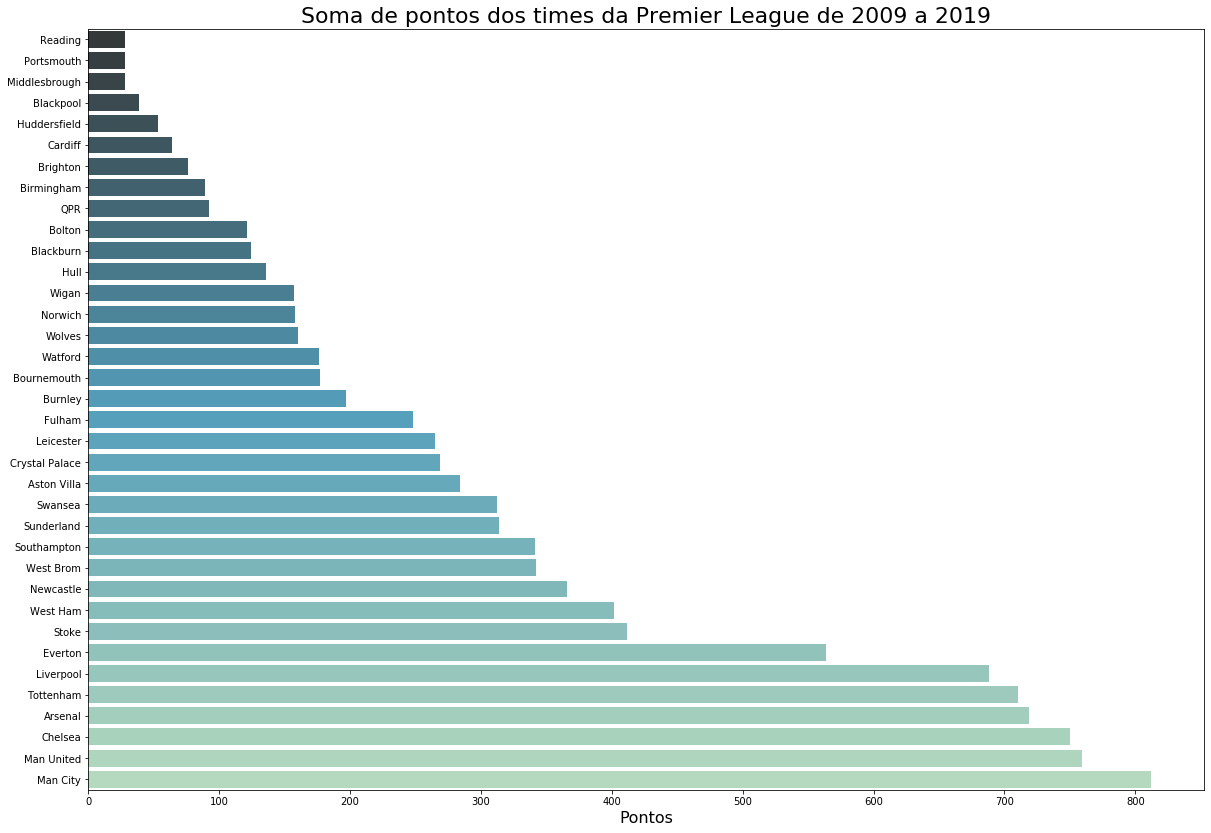

In [34]:
#Agrupando do DF times, o nome do time e o somatório de pontos e ordenando pelos valores(do menor para o maior)
pontos_ordenados = times.groupby('Time')['Pts'].sum().sort_values() 

#Plotando o gráfico de barras 
fig, ax = plt.subplots(figsize=(20, 14))
ax = sns.barplot(x='Pts',y='Time', data=times, palette = 'GnBu_d', order = pontos_ordenados.index)
ax.set_title('Soma de pontos dos times da Premier League de 2009 a 2019', fontsize=22)
ax.set_xlabel('Pontos', fontsize=16)
ax.set_ylabel('')
ax

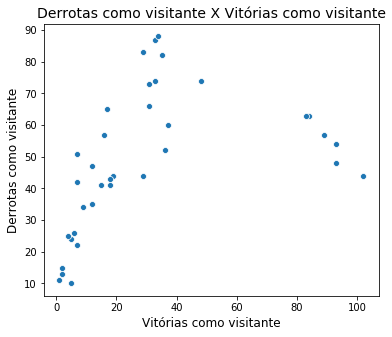

In [36]:
fig, ax = plt.subplots(figsize=(6, 5))
ax = sns.scatterplot(x='Vitórias fora', y='Derrotas fora', data=times)
ax.set_title('Derrotas como visitante X Vitórias como visitante',fontsize=14)
ax.set_xlabel('Vitórias como visitante', fontsize=12)
ax.set_ylabel('Derrotas como visitante', fontsize=12)
ax
#Até 40 vitórias como visitante, quanto mais vitórias, maior são as derrotas como visitante. Contudo, a partir desse ponto, quanto
#maior as vitórias, menor é o número de derrotas. Isso pode estar acontecendo pois se destacam os melhores times do campeonato.

# Conclusão

Eu espero que você tenha gostado das análises feitas neste Notebook sobre as partidas da Premier League. Essa foi a parte 1 deste projeto onde analisei as primeiras colunas do Dataset, respondi alguns questionamentos, criei DataFrames, transformei DataFrames e fiz o pré-processamento desses dados. A parte 2 logo estará disponível e assim como essa, vai estar aberta a sugestões, dicas e dúvidas.